In [1]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv("/content/sms_spam.csv",sep=',',names = ['label','message'])

In [6]:
dataset

,label,message
0,type,text
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5570,spam,This is the 2nd time we have tried 2 contact u...
5571,ham,Will ü b going to esplanade fr home?
5572,ham,"Pity, * was in mood for that. So...any other s..."
5573,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5575 non-null   object
 1   message  5575 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataset.describe()

,label,message
count,5575,5575
unique,3,5161
top,ham,"Sorry, I'll call later"
freq,4827,30


In [9]:
dataset['label'] = dataset['label'].map({'ham':0,'spam':1})

In [10]:
dataset

,label,message
0,NaN,text
1,0.0,"Go until jurong point, crazy.. Available only ..."
2,0.0,Ok lar... Joking wif u oni...
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
4,0.0,U dun say so early hor... U c already then say...
...,...,...
5570,1.0,This is the 2nd time we have tried 2 contact u...
5571,0.0,Will ü b going to esplanade fr home?
5572,0.0,"Pity, * was in mood for that. So...any other s..."
5573,0.0,The guy did some bitching but I acted like i'd...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

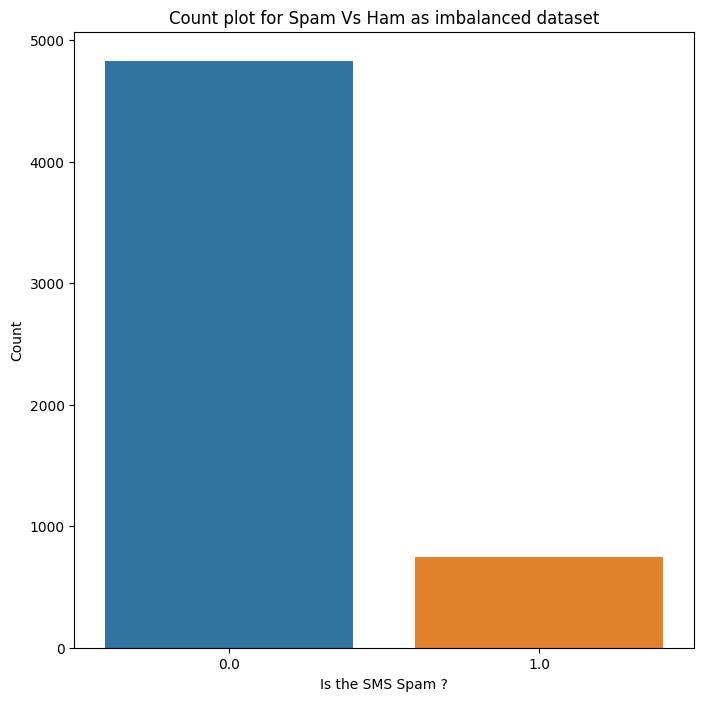

In [12]:
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data=dataset)
p = plt.title('Count plot for Spam Vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam ?')
p = plt.ylabel('Count')

In [13]:
only_spam = dataset[dataset["label"] == 1]

In [14]:
only_spam

,label,message
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
6,1.0,FreeMsg Hey there darling it's been 3 week's n...
9,1.0,WINNER!! As a valued network customer you have...
10,1.0,Had your mobile 11 months or more? U R entitle...
12,1.0,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
print('No of Spam SMS:',len(only_spam))
print('No of Ham SMS:',len(dataset)-len(only_spam))

No of Spam SMS: 747
No of Ham SMS: 4828


In [16]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [17]:
count

6

In [18]:
for i in range(0,count-1):
    dataset = pd.concat([dataset,only_spam])
dataset.shape

(9310, 2)

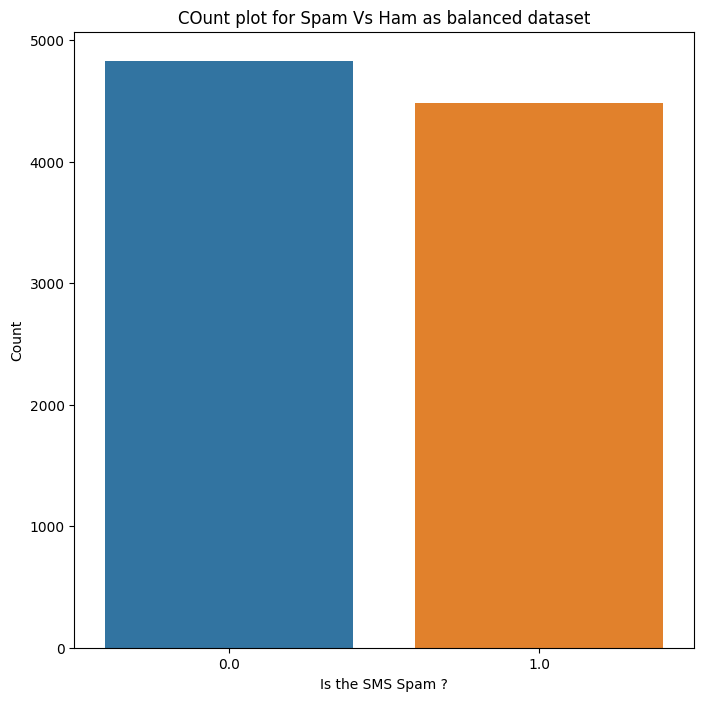

In [19]:
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data = dataset)
p = plt.title("COunt plot for Spam Vs Ham as balanced dataset")
p = plt.xlabel("Is the SMS Spam ?")
p = plt.ylabel("Count")

In [20]:
dataset['word_count'] = dataset['message'].apply(lambda x:len(x.split()))

In [21]:
dataset

,label,message,word_count
0,NaN,text,1
1,0.0,"Go until jurong point, crazy.. Available only ...",20
2,0.0,Ok lar... Joking wif u oni...,6
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,28
4,0.0,U dun say so early hor... U c already then say...,11
...,...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...,16
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...,28
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...,28


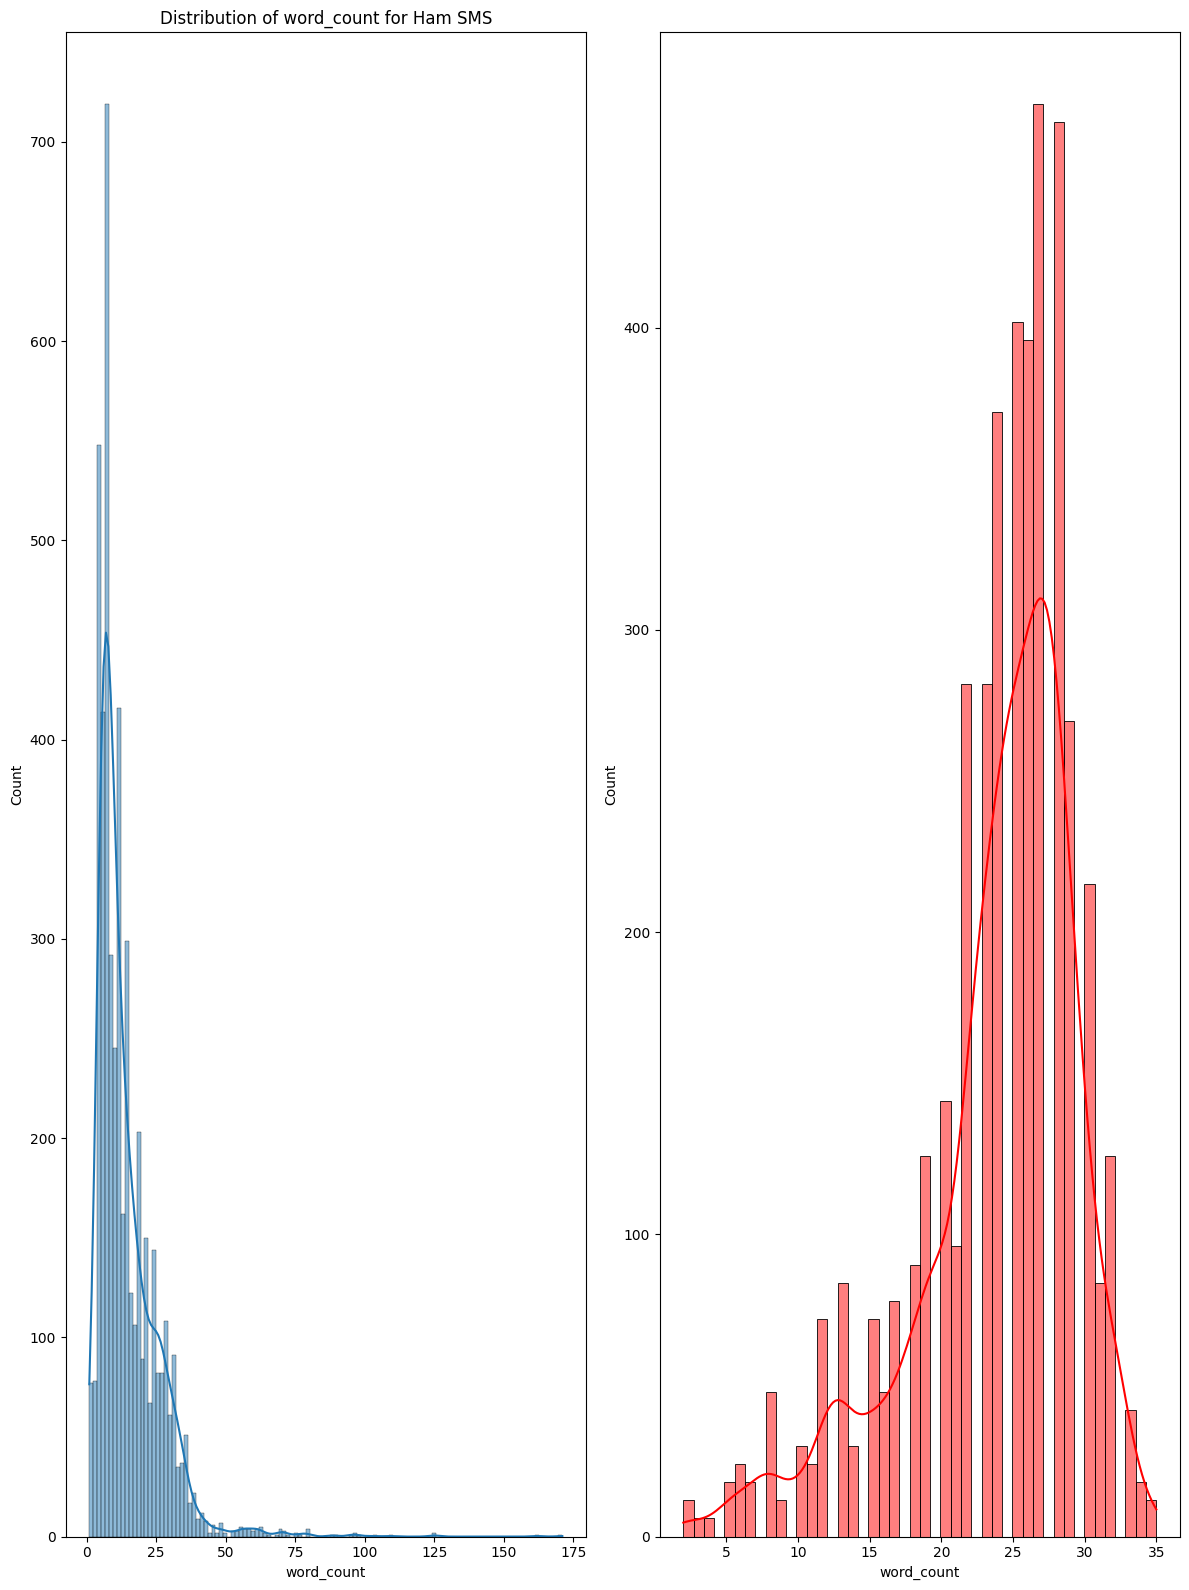

In [22]:
plt.figure(figsize=(12,16))
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"]==0].word_count,kde=True)
p = plt.title("Distribution of word_count for Ham SMS")
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"]==1].word_count,color='red',kde=True)
plt.tight_layout()
plt.show()

In [23]:
def currency(data):
    currency_symbols = ['£','$','¥','€','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [24]:
dataset["contains_currency_symbols"] = dataset['message'].apply(currency)

In [25]:
dataset

,label,message,word_count,contains_currency_symbols
0,NaN,text,1,0
1,0.0,"Go until jurong point, crazy.. Available only ...",20,0
2,0.0,Ok lar... Joking wif u oni...,6,0
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
4,0.0,U dun say so early hor... U c already then say...,11,0
...,...,...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


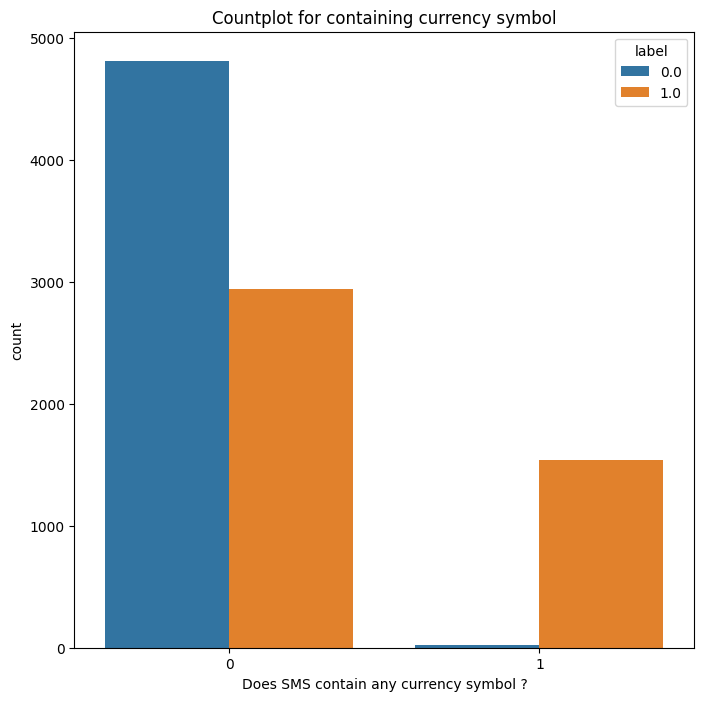

In [26]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols',data = dataset,hue = 'label')
p = plt.title("Countplot for containing currency symbol")
p = plt.xlabel("Does SMS contain any currency symbol ?")
p = plt.ylabel("count")

In [27]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [28]:
dataset["contains_number"] = dataset["message"].apply(number)

In [29]:
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,NaN,text,1,0,0
1,0.0,"Go until jurong point, crazy.. Available only ...",20,0,0
2,0.0,Ok lar... Joking wif u oni...,6,0,0
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
4,0.0,U dun say so early hor... U c already then say...,11,0,0
...,...,...,...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


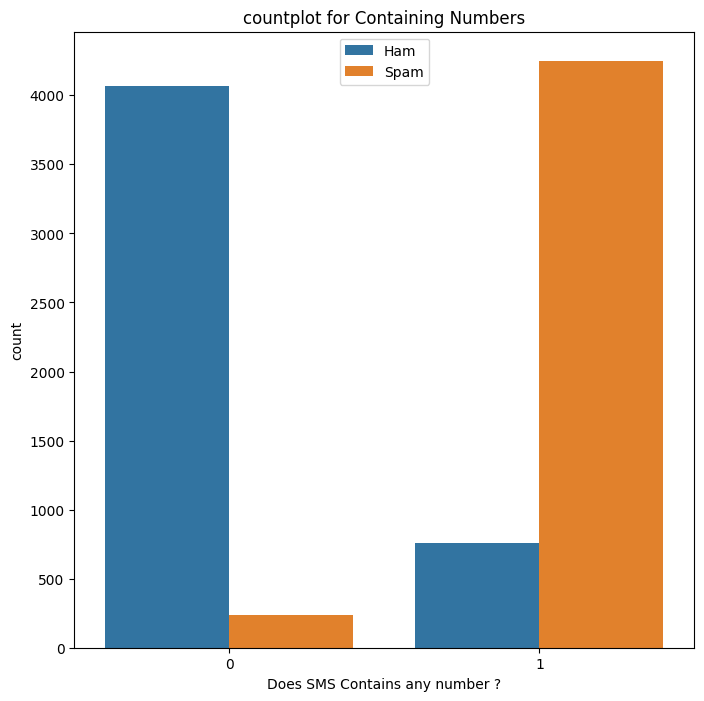

In [30]:
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_number', data = dataset, hue = 'label')
p = plt.title('countplot for Containing Numbers')
p = plt.xlabel('Does SMS Contains any number ?')
p = plt.ylabel('count')
p = plt.legend(labels=["Ham","Spam"],loc = 9)

In [31]:
import nltk
import re
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [34]:
corpus = []
wnl = WordNetLemmatizer()
for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in stopwords]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)

In [35]:
corpus

['text',
 'go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [37]:
x = pd.DataFrame(vectors,columns = feature_names)
y = dataset['label']

In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [40]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
8637,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3509,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4401,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495064,0.0,0.0,0.0,0.0,0.0
3095,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7949,0.0,0.0,0.303757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4271,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y.fillna(y.mean()), scoring = 'f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

nan
nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
  

In [42]:
from sklearn.metrics import classification_report

In [43]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [44]:
import numpy as np

nan_indices_y_test = np.isnan(y_test)
nan_indices_y_pred = np.isnan(y_pred)

print("NaN values in y_test:", np.any(nan_indices_y_test))
print("NaN values in y_pred:", np.any(nan_indices_y_pred))

NaN values in y_test: True
NaN values in y_pred: False


print(classification_report(y_test, y_pred))

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: ignored

In [ ]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g',cbar_kws = {'shrink':0.5},cmap="YlGnBu")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring = 'f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

In [ ]:
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred1))

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
cm

In [ ]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot = True, fmt='g',cbar_kws={'shrink':0.5},cmap="YlGnBu")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

In [ ]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
def predict_spam(sms):
  message = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sms)
  message = message.lower()
  words = message.split()
  filtered_words = [word for word in words if word not in set(stop)]
  lemm_words = [wnl.lemmatize(word) for word in filtered_words]
  message = ' '.join(lemm_words)
  temp = tfidf.transform([message]).toarray()
  return mnb.predict(temp)

In [ ]:
#prediction 1
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply for info or STOP to opt out.'
if predict_spam(sample_message):
  print("Gotcha! This is a SPAM message.")
else:
  print("This is a HAM (normal) message.")

In [ ]:
#prediction 2
sample_message = 'Came to think of it. I have never got a spam message before.'
if predict_spam(sample_message):
  print("Gotcha! This is a SPAM message.")
else:
  print("This is a HAM (normal) message.")

In [ ]:
#prediction 3
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ********.'
if predict_spam(sample_message):
  print("Gotcha! This is a SPAM message.")
else:
  print("This is a HAM (normal) message.")